In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [10]:
df = sns.load_dataset('penguins')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<AxesSubplot:xlabel='species', ylabel='count'>

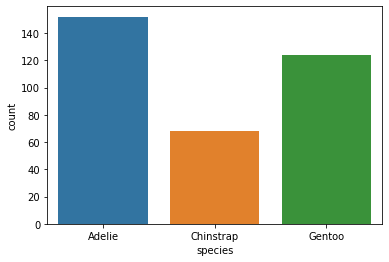

In [39]:
sns.countplot(x='species',data=df) # its imbalanced

In [12]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [13]:
df['sex'].replace(np.nan,df['sex'].value_counts().idxmax(),inplace=True)

In [15]:
genderEnc = LabelEncoder()
df['sex'] = genderEnc.fit_transform(df['sex'])

In [20]:
cols_to_impute  = df.columns.tolist()[2:-1]
imputer = SimpleImputer()
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,1
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,0
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,1
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,0


In [24]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [27]:
islandEncoder = OneHotEncoder(drop='first')
island_dummy = islandEncoder.fit_transform(df[['island']]).toarray()
islanddf = pd.DataFrame(island_dummy,columns=['Biscoe', 'Dream'])

In [31]:
clean_df = pd.concat([df,islanddf],axis=1)
clean_df.drop(columns=['island'],axis=1, inplace=True)
clean_df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream
0,Adelie,39.10000,18.70000,181.000000,3750.000000,1,0.0,1.0
1,Adelie,39.50000,17.40000,186.000000,3800.000000,0,0.0,1.0
2,Adelie,40.30000,18.00000,195.000000,3250.000000,0,0.0,1.0
3,Adelie,43.92193,17.15117,200.915205,4201.754386,1,0.0,1.0
4,Adelie,36.70000,19.30000,193.000000,3450.000000,0,0.0,1.0
...,...,...,...,...,...,...,...,...
339,Gentoo,43.92193,17.15117,200.915205,4201.754386,1,0.0,0.0
340,Gentoo,46.80000,14.30000,215.000000,4850.000000,0,0.0,0.0
341,Gentoo,50.40000,15.70000,222.000000,5750.000000,1,0.0,0.0
342,Gentoo,45.20000,14.80000,212.000000,5200.000000,0,0.0,0.0


In [34]:
x = clean_df[clean_df.columns.to_list()[1:]]
y = clean_df['species']

In [35]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [63]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [82]:
params= {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'dual':[True,False],
    'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
}
model =LogisticRegression()
grid = GridSearchCV(model, params, cv=3, n_jobs=-1, verbose=True)

In [83]:
grid.fit(x,y)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.5s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'dual': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             verbose=True)

In [84]:
griddf  = pd.DataFrame(grid.cv_results_)
griddf.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dual,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001337,0.000477,0.0,0.0,True,l1,newton-cg,"{'dual': True, 'penalty': 'l1', 'solver': 'new...",NaN,NaN,NaN,NaN,NaN,17
1,0.001003,0.000820,0.0,0.0,True,l1,lbfgs,"{'dual': True, 'penalty': 'l1', 'solver': 'lbf...",NaN,NaN,NaN,NaN,NaN,30
2,0.001365,0.000966,0.0,0.0,True,l1,sag,"{'dual': True, 'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,NaN,NaN,NaN,29
3,0.000662,0.000468,0.0,0.0,True,l1,saga,"{'dual': True, 'penalty': 'l1', 'solver': 'saga'}",NaN,NaN,NaN,NaN,NaN,28
4,0.001334,0.000482,0.0,0.0,True,l2,newton-cg,"{'dual': True, 'penalty': 'l2', 'solver': 'new...",NaN,NaN,NaN,NaN,NaN,27


In [85]:
griddf.sort_values(by='rank_test_score',inplace=True)

In [86]:
grid.best_estimator_

LogisticRegression(solver='newton-cg')

In [87]:
df['prediction'] = grid.best_estimator_.predict(x)

In [88]:
confusion_matrix(y,df['prediction'])

array([[151,   1,   0],
       [  2,  66,   0],
       [  1,   0, 123]], dtype=int64)

In [72]:
print(classification_report(y,df['prediction']))

              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61       152
   Chinstrap       0.00      0.00      0.00        68
      Gentoo       0.00      0.00      0.00       124

    accuracy                           0.44       344
   macro avg       0.15      0.33      0.20       344
weighted avg       0.20      0.44      0.27       344

C:\Users\xaidi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
px.scatter_3d(df,x='bill_length_mm',y='bill_depth_mm',z='flipper_length_mm',color='species')

In [92]:
x = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']]
scaled_x = StandardScaler()
x = scaled_x.fit_transform(x)
y = df['species']

In [94]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2)
m1 = KNeighborsClassifier()
m1.fit(xtrain,ytrain)
ypred = m1.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
m2 = LogisticRegression()
m2.fit(xtrain,ytrain)
ypred2 = m2.predict(xtest)
print(confusion_matrix(ytest,ypred2))
print(classification_report(ytest,ypred2))

[[34  0  0]
 [ 0 13  0]
 [ 0  0 22]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        34
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        22

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

[[34  0  0]
 [ 0 13  0]
 [ 0  0 22]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        34
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        22

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

